## Title

## Introduction

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

## Preliminary exploratory data analysis
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- **Using only training data**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- **Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [19]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

variable_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleve_data <- read.table("data/processed.cleveland.data", header=TRUE, sep = ",", col.names = variable_names)
cleve_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


The above is our inital datatset read from the web. Here we are only considering the cleveland dataset that has been preprocessed already meaning not additional wrangling is required to make the dataset tidy. Below, we will only be considering the age, sex, trestbps (resting blood pressure), cholesteral, and max heart rate attributes for our predictors as these variables are the most important when trying to classify a whether a patient has heart disease. 

Below, we have selected only the columns that we wish to look at:

In [22]:
cleve_data <- cleve_data |>
                select(age, sex, trestbps, chol, thalach, num)

cleve_data

age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
67,1,160,286,108,2
67,1,120,229,129,1
37,1,130,250,187,0
⋮,⋮,⋮,⋮,⋮,⋮
57,1,130,131,115,3
57,0,130,236,174,1
38,1,138,175,173,0


Now that the data has been filtered to only contain columns of interest, we can split into training and testing subsets with a 75%, 25% split. 

In [14]:
set.seed(1)

cleve_split <- initial_split(cleve_data, prop=0.75, strata=num)
cleve_train <- training(cleve_split)
cleve_test <- testing(cleve_split)

cleve_train
cleve_test

age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
37,1,130,250,187,0
56,1,120,236,178,0
44,1,120,263,173,0
⋮,⋮,⋮,⋮,⋮,⋮
55,0,128,205,130,3
59,1,164,176,90,3
57,1,130,131,115,3


age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
41,0,130,204,172,0
57,0,120,354,163,0
57,1,140,192,148,0
⋮,⋮,⋮,⋮,⋮,⋮
58,1,114,318,140,4
68,1,144,193,141,2
57,0,130,236,174,1


Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.

Below is a table containing summary information regarding the number of observations in each class and the means of the predictor variables we selected from above. There are no missing values in any of these columns as stated in the dataset database.

In [35]:
cleve_train_summary <- cleve_train |>
  group_by(num) |>
  summarise(
    across(where(is.numeric), mean, na.rm = TRUE),  
    n = n()
  )

cleve_train_summary

num,age,sex,trestbps,chol,thalach,n
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.00813,0.6097561,127.8130,240.2114,159.2358,123
1,55.68293,0.8292683,133.4878,248.7561,144.3171,41
2,57.56000,0.8400000,133.9200,265.0000,132.8000,25
3,55.15385,0.8846154,132.5769,241.7308,133.6538,26
4,58.50000,0.9000000,139.5000,239.5000,140.9000,10


Using the training data, we can also create a histogram to display the distribution of all our predictor variables. This lets us a visualization of what our data looks like while also conducting a sanity check to make sure the variables make sense. 

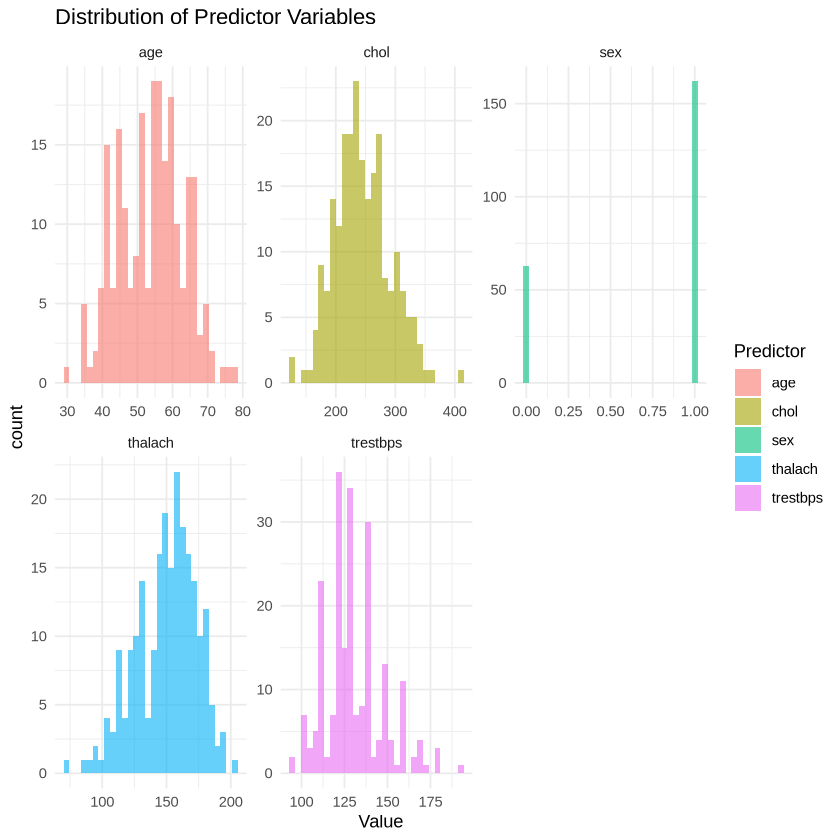

In [44]:
predictor_variables <- c("age", "sex", "trestbps", "chol", "thalach")

data_long <- pivot_longer(cleve_train, cols = predictor_variables, names_to = "Predictor", values_to = "Value")

plot <- ggplot(data_long, aes(x = Value, fill = Predictor)) +
  geom_histogram(bins = 30, alpha = 0.6, position = "identity") +
  facet_wrap(~ Predictor, scales = "free") +
  theme_minimal() +
  labs(title = "Distribution of Predictor Variables")

plot

## Methods
- Explain how you will conduct either your data analysis and which variables/columns you will use. <ins>Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?</ins>
- Describe at least one way that you will visualize the results


## Expected outcomes and significance
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?
